# Raw Analytics - Campeonato Brasileiro

Análise exploratória dos dados brutos do Campeonato Brasileiro (2003-2023).

**Objetivo**: Camada raw, analisar os dados brutos e entender como estão estruturados.

**Datasets:**
- `campeonato-brasileiro-full.csv` - Dados das partidas
- `campeonato-brasileiro-gols.csv` - Gols marcados
- `campeonato-brasileiro-cartoes.csv` - Cartões aplicados
- `campeonato-brasileiro-estatisticas-full.csv` - Estatísticas das partidas

## 1. Configuração e Importações

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime


## 2. Carregamento dos DataSets

In [17]:
PATH_PARTIDAS = 'campeonato-brasileiro-full.csv'
PATH_GOLS = 'campeonato-brasileiro-gols.csv'
PATH_CARTOES = 'campeonato-brasileiro-cartoes.csv'
PATH_ESTATISTICAS = 'campeonato-brasileiro-estatisticas-full.csv'

df_partidas = pd.read_csv(PATH_PARTIDAS)
df_gols = pd.read_csv(PATH_GOLS)
df_cartoes = pd.read_csv(PATH_CARTOES)
df_estatisticas = pd.read_csv(PATH_ESTATISTICAS)

## 3. Dados das Tabelas

### 3.1 Informações (PARTIDAS)

### 3.2 Analise de valores nulos (PARTIDAS)

### 3.3 Linhas totalmente Vazias (PARTIDAS)

In [27]:
df_partidas[df_partidas.isnull().all(axis=1)]

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,ano


### 3.4 Linhas duplicadas (PARTIDAS)

In [19]:
df_partidas.duplicated().sum()


np.int64(0)

### 3.5 Informações (GOLS)

In [5]:
df_gols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9861 entries, 0 to 9860
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   9861 non-null   int64 
 1   rodata       9861 non-null   int64 
 2   clube        9861 non-null   object
 3   atleta       9861 non-null   object
 4   minuto       9861 non-null   object
 5   tipo_de_gol  1183 non-null   object
dtypes: int64(2), object(4)
memory usage: 462.4+ KB


### 3.6 Analise de valores nulos (GOLS)

In [20]:
null_counts = df_gols.isnull().sum()
null_percent = (df_gols.isnull().mean() * 100).round(2)

pd.DataFrame({
    'nulos': null_counts,
    'percentual_%': null_percent
}).sort_values('percentual_%', ascending=False)

,nulos,percentual_%
tipo_de_gol,8678,88.0
partida_id,0,0.0
rodata,0,0.0
clube,0,0.0
atleta,0,0.0
minuto,0,0.0


### 3.7 Linhas totalmente Vazias (GOLS)

In [21]:
df_gols[df_gols.isnull().all(axis=1)]

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol


### 3.8 Informações (CARTÕES)

In [22]:
df_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20953 entries, 0 to 20952
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  20953 non-null  int64  
 1   rodata      20953 non-null  int64  
 2   clube       20953 non-null  object 
 3   cartao      20953 non-null  object 
 4   atleta      20947 non-null  object 
 5   num_camisa  20567 non-null  float64
 6   posicao     19755 non-null  object 
 7   minuto      20953 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ MB


### 3.9 Analise de valores nulos (CARTÕES)

In [13]:
null_counts = df_cartoes.isnull().sum()
null_percent = (df_cartoes.isnull().mean() * 100).round(2)

pd.DataFrame({
    'nulos': null_counts,
    'percentual_%': null_percent
}).sort_values('percentual_%', ascending=False)

,nulos,percentual_%
posicao,1198,5.72
num_camisa,386,1.84
atleta,6,0.03
partida_id,0,0.00
cartao,0,0.00
clube,0,0.00
rodata,0,0.00
minuto,0,0.00


### 3.10 Linhas totalmente Vazias (CARTÕES)

In [14]:
df_gols[df_gols.isnull().all(axis=1)]

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol


### 3.11 Informações (ESTASTITICA)

In [23]:
df_estatisticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       17570 non-null  int64 
 1   rodata           17570 non-null  int64 
 2   clube            17570 non-null  object
 3   chutes           17570 non-null  int64 
 4   chutes_no_alvo   17570 non-null  int64 
 5   posse_de_bola    6820 non-null   object
 6   passes           17570 non-null  int64 
 7   precisao_passes  4512 non-null   object
 8   faltas           17570 non-null  int64 
 9   cartao_amarelo   17570 non-null  int64 
 10  cartao_vermelho  17570 non-null  int64 
 11  impedimentos     17570 non-null  int64 
 12  escanteios       17570 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.7+ MB


### 3.12 Analise de valores nulos (ESTATISTICA)

In [24]:
null_counts = df_estatisticas.isnull().sum()
null_percent = (df_estatisticas.isnull().mean() * 100).round(2)

pd.DataFrame({
    'nulos': null_counts,
    'percentual_%': null_percent
}).sort_values('percentual_%', ascending=False)

,nulos,percentual_%
precisao_passes,13058,74.32
posse_de_bola,10750,61.18
clube,0,0.00
rodata,0,0.00
partida_id,0,0.00
chutes_no_alvo,0,0.00
chutes,0,0.00
passes,0,0.00
faltas,0,0.00
cartao_amarelo,0,0.00


### 3.13 Linhas totalmente Vazias (ESTATISTICA)

In [25]:
df_estatisticas[df_estatisticas.isnull().all(axis=1)]

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios


### 3.13 Linhas totalmente Vazias (ESTATISTICA)


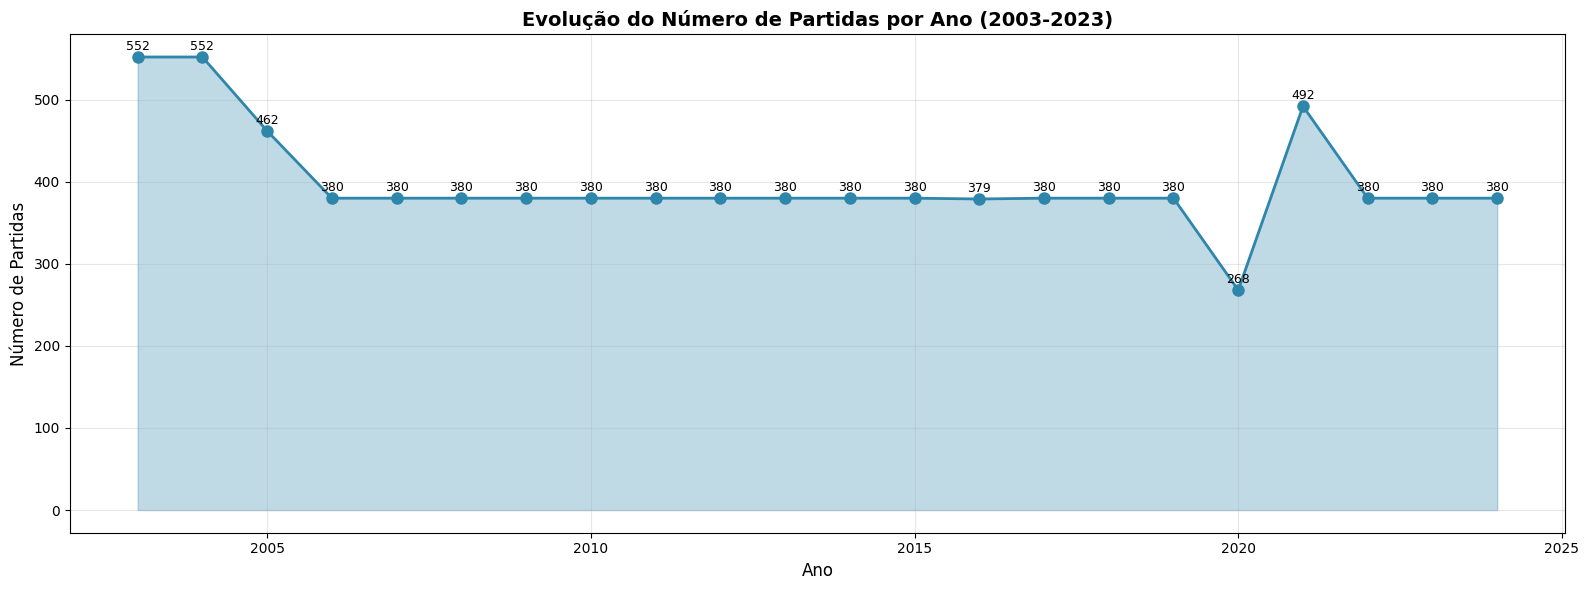


Período: 2003 - 2024
Total de anos: 22
Média de partidas/ano: 399


In [26]:
df_partidas['ano'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y', errors='coerce').dt.year

partidas_por_ano = df_partidas['ano'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(partidas_por_ano.index, partidas_por_ano.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax.fill_between(partidas_por_ano.index, partidas_por_ano.values, alpha=0.3, color='#2E86AB')

ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Partidas', fontsize=12)
ax.set_title('Evolução do Número de Partidas por Ano (2003-2023)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

for x, y in zip(partidas_por_ano.index, partidas_por_ano.values):
    ax.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nPeríodo: {int(partidas_por_ano.index.min())} - {int(partidas_por_ano.index.max())}")
print(f"Total de anos: {len(partidas_por_ano)}")
print(f"Média de partidas/ano: {partidas_por_ano.mean():.0f}")

## 4. Análise Temporal das Partidas


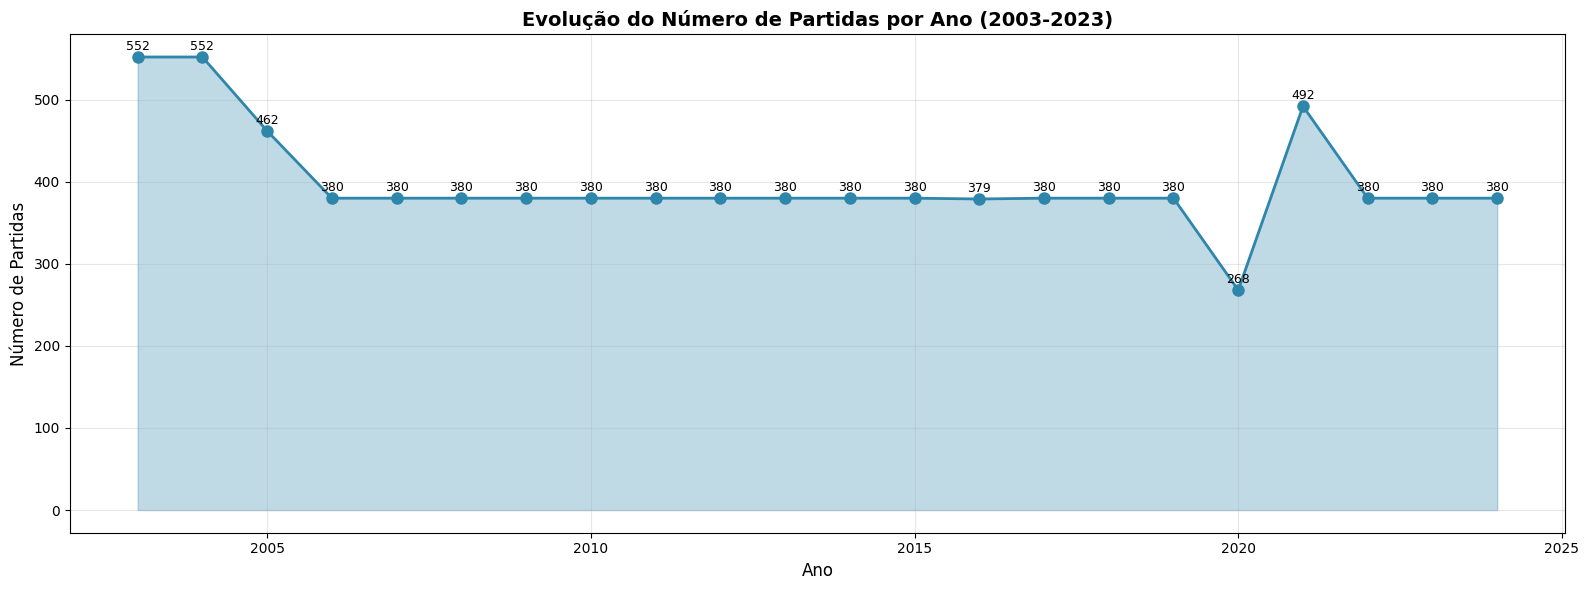


Período: 2003 - 2024
Total de anos: 22
Média de partidas/ano: 399


In [8]:
df_partidas['ano'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y', errors='coerce').dt.year

partidas_por_ano = df_partidas['ano'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(partidas_por_ano.index, partidas_por_ano.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax.fill_between(partidas_por_ano.index, partidas_por_ano.values, alpha=0.3, color='#2E86AB')

ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Partidas', fontsize=12)
ax.set_title('Evolução do Número de Partidas por Ano (2003-2023)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

for x, y in zip(partidas_por_ano.index, partidas_por_ano.values):
    ax.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nPeríodo: {int(partidas_por_ano.index.min())} - {int(partidas_por_ano.index.max())}")
print(f"Total de anos: {len(partidas_por_ano)}")
print(f"Média de partidas/ano: {partidas_por_ano.mean():.0f}")

## 5. Análise de Times


Total de times únicos: 45
Times como mandante: 45
Times como visitante: 45


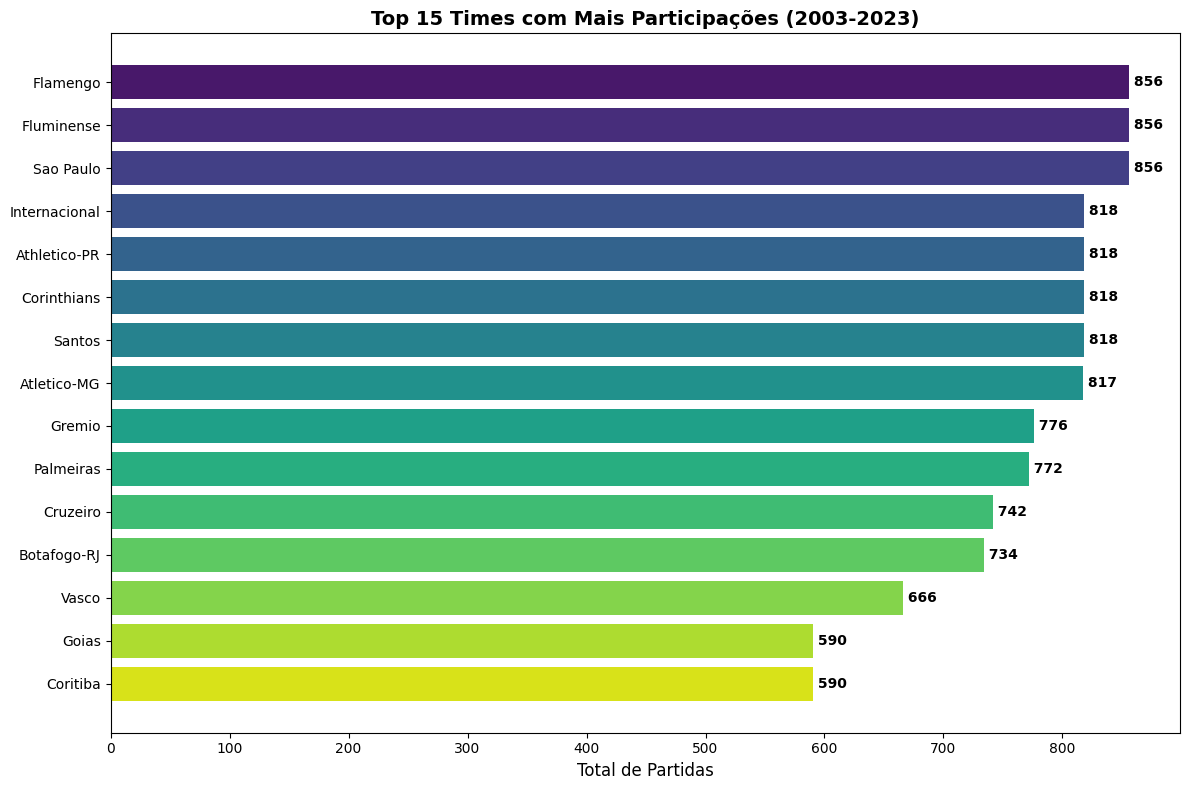

In [18]:
times_mandante = set(df_partidas['mandante'].unique())
times_visitante = set(df_partidas['visitante'].unique())
todos_times = times_mandante.union(times_visitante)

print(f"Total de times únicos: {len(todos_times)}")
print(f"Times como mandante: {len(times_mandante)}")
print(f"Times como visitante: {len(times_visitante)}")

participacoes_mandante = df_partidas['mandante'].value_counts()
participacoes_visitante = df_partidas['visitante'].value_counts()

total_participacoes = (participacoes_mandante + participacoes_visitante).fillna(0).astype(int).sort_values(ascending=False)

top_15_times = total_participacoes.head(15)

fig, ax = plt.subplots(figsize=(12, 8))

colors = sns.color_palette('viridis', n_colors=len(top_15_times))

bars = ax.barh(top_15_times.index, top_15_times.values, color=colors)

ax.set_xlabel('Total de Partidas', fontsize=12)
ax.set_title('Top 15 Times com Mais Participações (2003-2023)', fontsize=14, fontweight='bold')

ax.invert_yaxis()

for i, (time, valor) in enumerate(top_15_times.items()):
    ax.text(valor, i, f' {valor:,}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Análise de Gols


Total de gols registrados: 9,861
Partidas com gols registrados: 3,819
Times que marcaram gols: 34


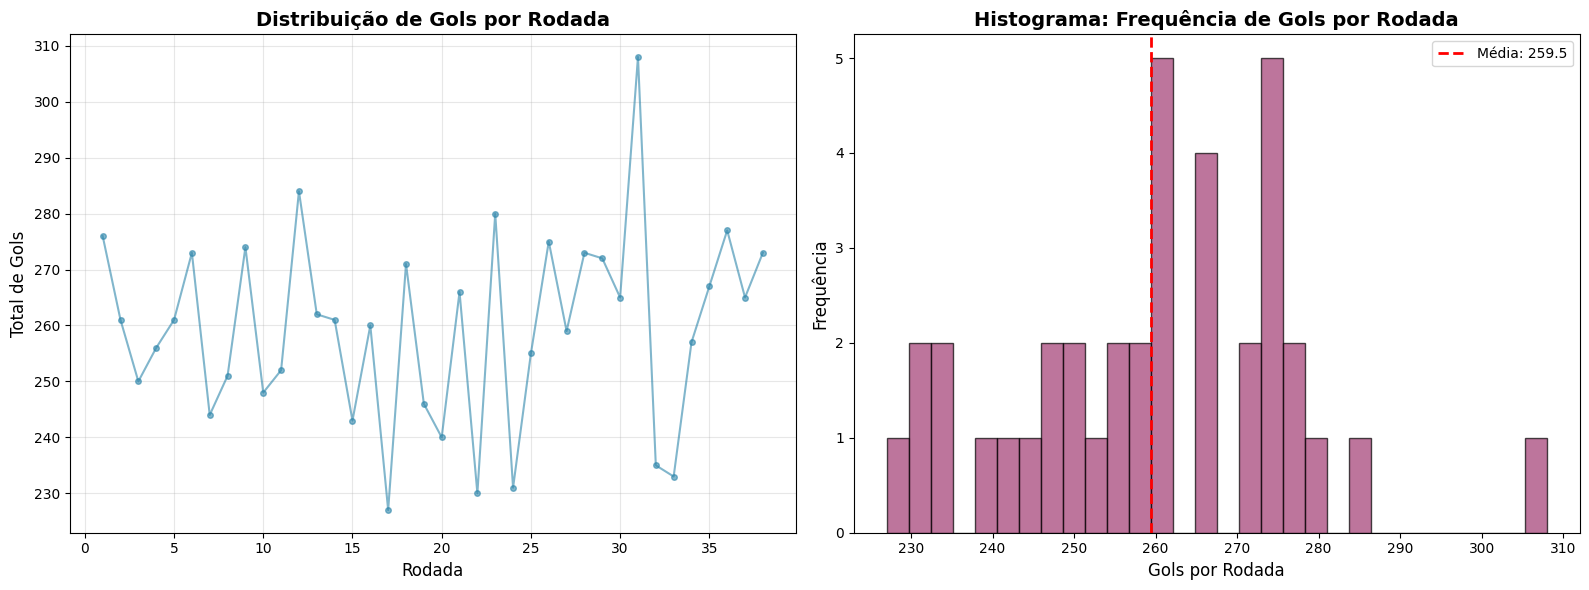


Média de gols por rodada: 259.50
Rodada com mais gols: Rodada 31 (308 gols)
Rodada com menos gols: Rodada 17 (227 gols)


In [6]:
# Estatísticas gerais de gols
print(f"Total de gols registrados: {len(df_gols):,}")
print(f"Partidas com gols registrados: {df_gols['partida_id'].nunique():,}")
print(f"Times que marcaram gols: {df_gols['clube'].nunique()}")

# Distribuição de gols por rodada
gols_por_rodada = df_gols.groupby('rodata').size().reset_index(name='total_gols')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gols por rodada ao longo do tempo
ax1.plot(gols_por_rodada['rodata'], gols_por_rodada['total_gols'], 
         marker='o', linewidth=1.5, markersize=4, alpha=0.6, color='#2E86AB')
ax1.set_xlabel('Rodada', fontsize=12)
ax1.set_ylabel('Total de Gols', fontsize=12)
ax1.set_title('Distribuição de Gols por Rodada', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Histograma de gols por rodada
ax2.hist(gols_por_rodada['total_gols'], bins=30, edgecolor='black', color='#A23B72', alpha=0.7)
ax2.set_xlabel('Gols por Rodada', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_title('Histograma: Frequência de Gols por Rodada', fontsize=14, fontweight='bold')
ax2.axvline(gols_por_rodada['total_gols'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f'Média: {gols_por_rodada["total_gols"].mean():.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nMédia de gols por rodada: {gols_por_rodada['total_gols'].mean():.2f}")
print(f"Rodada com mais gols: Rodada {gols_por_rodada.loc[gols_por_rodada['total_gols'].idxmax(), 'rodata']} ({gols_por_rodada['total_gols'].max()} gols)")
print(f"Rodada com menos gols: Rodada {gols_por_rodada.loc[gols_por_rodada['total_gols'].idxmin(), 'rodata']} ({gols_por_rodada['total_gols'].min()} gols)")

### 6.1 Top Artilheiros


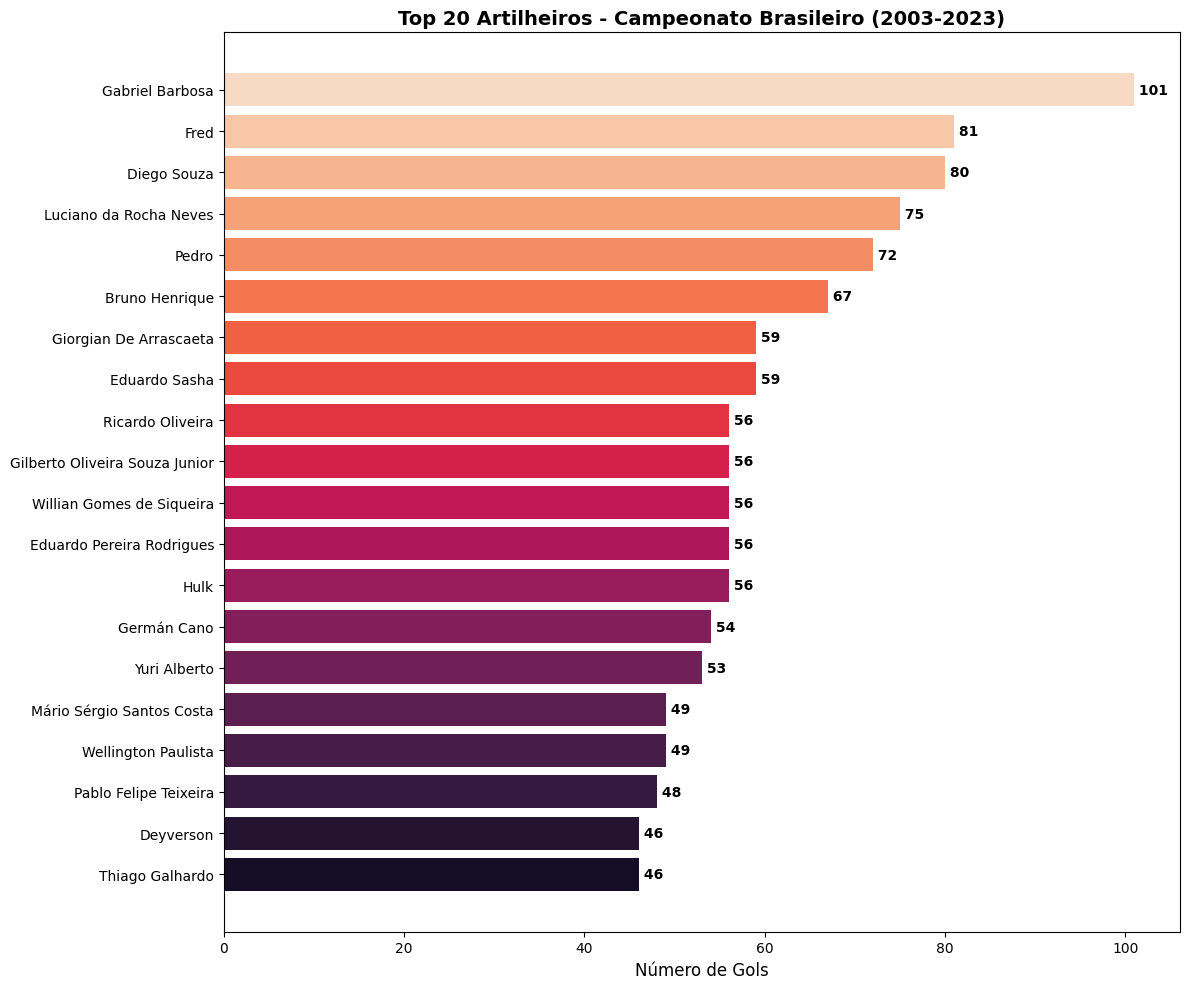


Maior artilheiro: Gabriel Barbosa com 101 gols


In [7]:
top_artilheiros = df_gols['atleta'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 10))

colors = sns.color_palette('rocket_r', n_colors=len(top_artilheiros))

bars = ax.barh(top_artilheiros.index, top_artilheiros.values, color=colors)

ax.set_xlabel('Número de Gols', fontsize=12)
ax.set_title('Top 20 Artilheiros - Campeonato Brasileiro (2003-2023)', fontsize=14, fontweight='bold')

ax.invert_yaxis()

for i, (atleta, gols) in enumerate(top_artilheiros.items()):
    ax.text(gols, i, f' {gols}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nMaior artilheiro: {top_artilheiros.index[0]} com {top_artilheiros.values[0]} gols")

### 6.2 Times que Mais Marcaram Gols


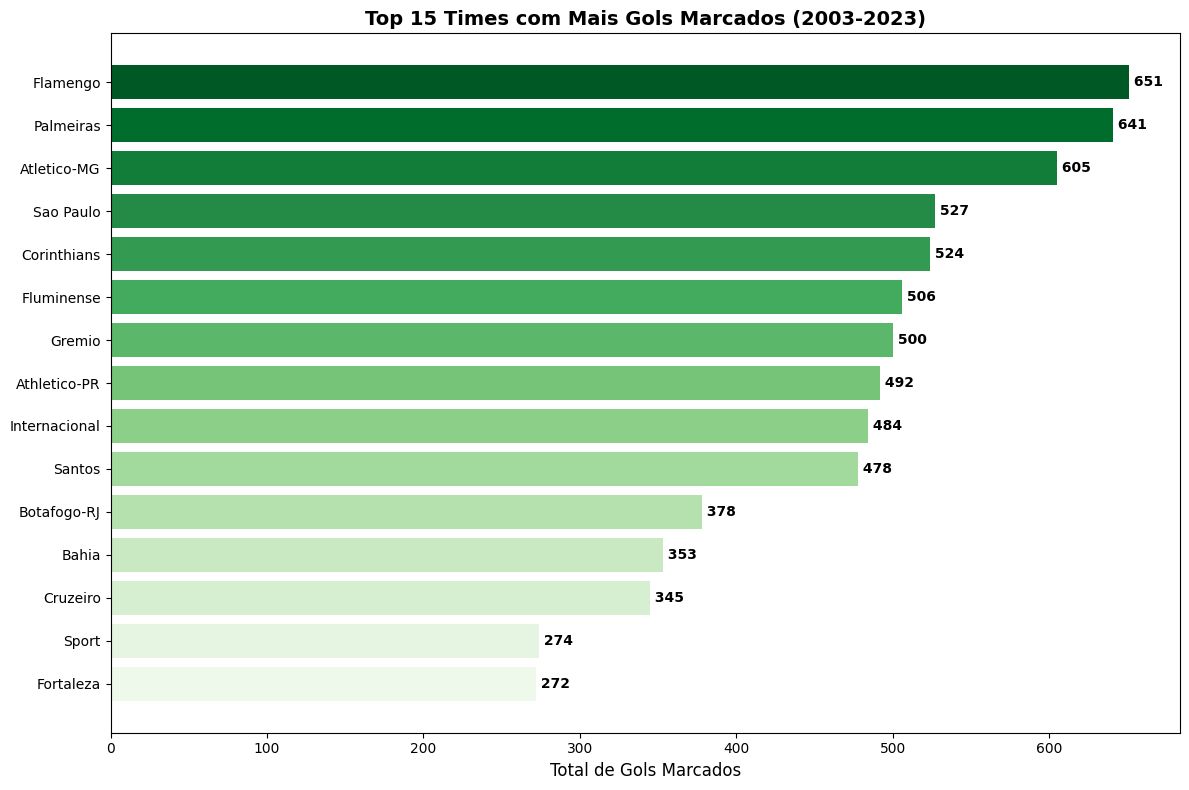

In [8]:
# Top 15 times que mais marcaram gols
top_times_gols = df_gols['clube'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette('Greens_r', n_colors=len(top_times_gols))
bars = ax.barh(top_times_gols.index, top_times_gols.values, color=colors)

ax.set_xlabel('Total de Gols Marcados', fontsize=12)
ax.set_title('Top 15 Times com Mais Gols Marcados (2003-2023)', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for i, (time, gols) in enumerate(top_times_gols.items()):
    ax.text(gols, i, f' {gols:,}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3 Análise de Tipos de Gol


Distribuição por tipo de gol:
  Gol Normal: 8,678 (88.0%)
  Penalty: 935 (9.5%)
  Gol Contra: 248 (2.5%)


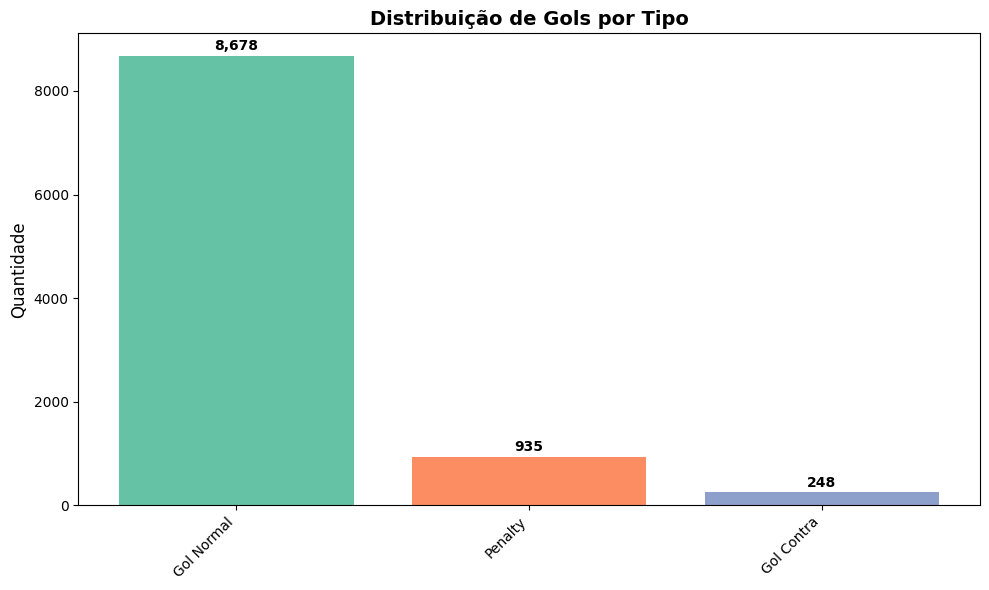

In [10]:
# Tipos de gols
tipos_gols = df_gols['tipo_de_gol'].fillna('Gol Normal').value_counts()

print("Distribuição por tipo de gol:")
for tipo, qtd in tipos_gols.items():
    pct = (qtd / len(df_gols)) * 100
    print(f"  {tipo if tipo else 'Gol Normal'}: {qtd:,} ({pct:.1f}%)")

# Visualização
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette('Set2', n_colors=len(tipos_gols))
ax.bar(range(len(tipos_gols)), tipos_gols.values, color=colors)
ax.set_xticks(range(len(tipos_gols)))
ax.set_xticklabels([t if t else 'Normal' for t in tipos_gols.index], rotation=45, ha='right')
ax.set_ylabel('Quantidade', fontsize=12)
ax.set_title('Distribuição de Gols por Tipo', fontsize=14, fontweight='bold')

for i, v in enumerate(tipos_gols.values):
    ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Análise de Cartões


Total de cartões aplicados: 20,953

Distribuição por tipo de cartão:
  Amarelo: 19,867 (94.8%)
  Vermelho: 1,086 (5.2%)


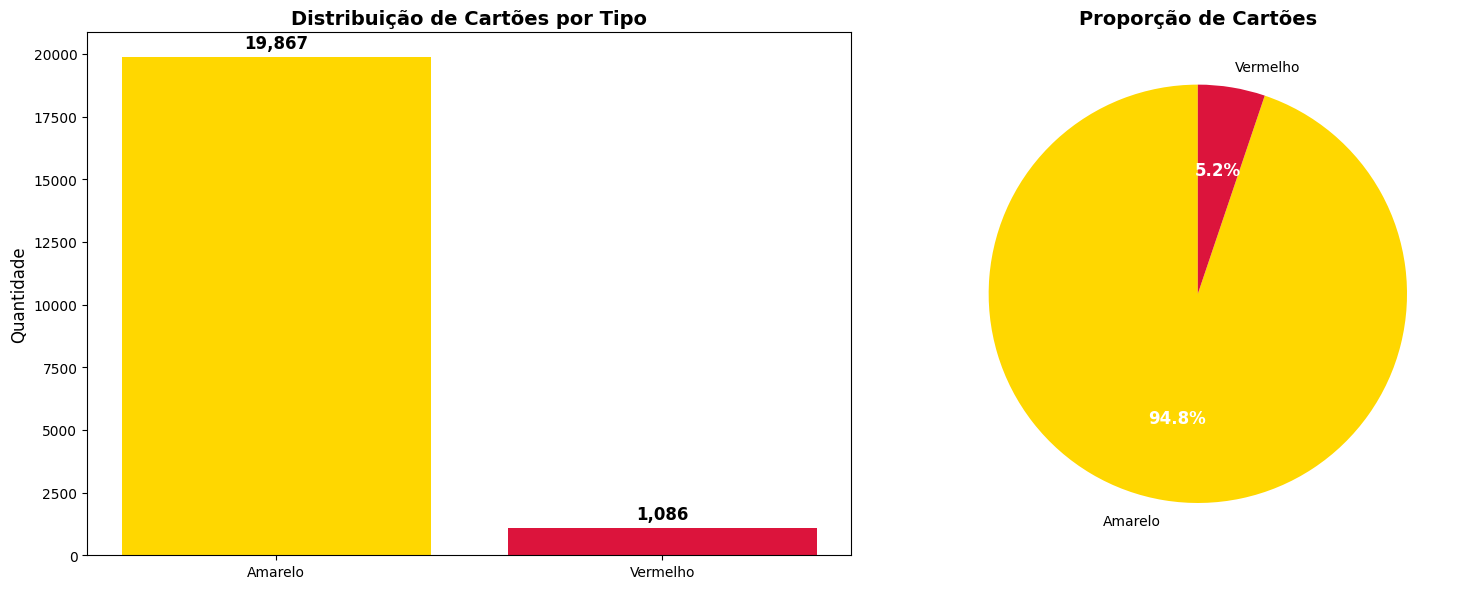

In [22]:
print(f"Total de cartões aplicados: {len(df_cartoes):,}")

cartoes_por_tipo = df_cartoes['cartao'].value_counts()

print("\nDistribuição por tipo de cartão:")
for tipo, qtd in cartoes_por_tipo.items():
    pct = (qtd / len(df_cartoes)) * 100
    print(f"  {tipo}: {qtd:,} ({pct:.1f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors_cartoes = {'Amarelo': '#FFD700', 'Vermelho': '#DC143C'}

bars = ax1.bar(cartoes_por_tipo.index, cartoes_por_tipo.values, 
               color=[colors_cartoes.get(c, 'gray') for c in cartoes_por_tipo.index])

ax1.set_ylabel('Quantidade', fontsize=12)
ax1.set_title('Distribuição de Cartões por Tipo', fontsize=14, fontweight='bold')

for i, v in enumerate(cartoes_por_tipo.values):
    ax1.text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

wedges, texts, autotexts = ax2.pie(cartoes_por_tipo.values, 
                                     labels=cartoes_por_tipo.index,
                                     autopct='%1.1f%%', 
                                     startangle=90,
                                     colors=[colors_cartoes.get(c, 'gray') for c in cartoes_por_tipo.index])

ax2.set_title('Proporção de Cartões', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

### 7.1 Times Mais Indisciplinados


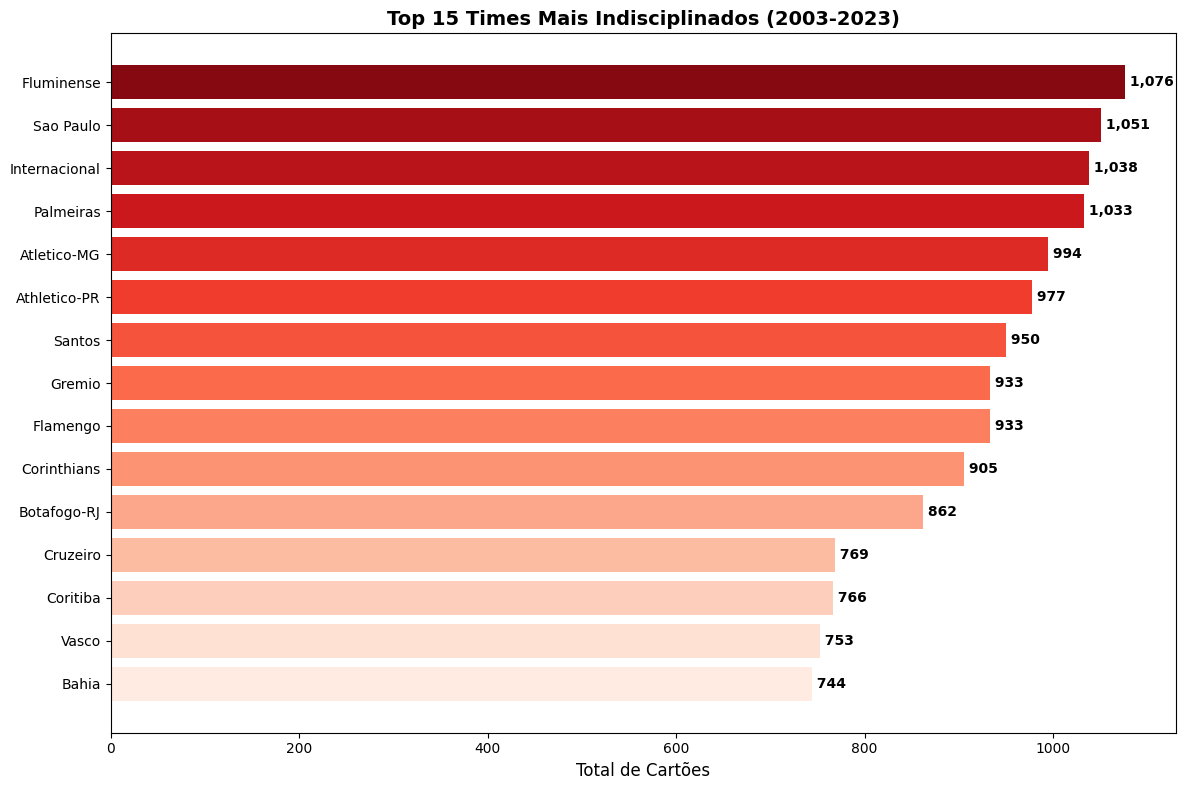

In [21]:
top_cartoes_times = df_cartoes['clube'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 8))

colors = sns.color_palette('Reds_r', n_colors=len(top_cartoes_times))

bars = ax.barh(top_cartoes_times.index, top_cartoes_times.values, color=colors)

ax.set_xlabel('Total de Cartões', fontsize=12)
ax.set_title('Top 15 Times Mais Indisciplinados (2003-2023)', fontsize=14, fontweight='bold')

ax.invert_yaxis()

for i, (time, cartoes) in enumerate(top_cartoes_times.items()):
    ax.text(cartoes, i, f' {cartoes:,}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Análise de Estatísticas


In [15]:
colunas_numericas = ['chutes', 'chutes_no_alvo', 'passes', 'faltas', 
                     'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios']

df_stats_filtrado = df_estatisticas[df_estatisticas[colunas_numericas].sum(axis=1) > 0]

print(f"Total de registros com estatísticas: {len(df_stats_filtrado):,} de {len(df_estatisticas):,}")
print(f"Registros sem dados: {len(df_estatisticas) - len(df_stats_filtrado):,}")

if len(df_stats_filtrado) > 0:
    print("\nEstatísticas Descritivas (registros com dados):\n")
    print(df_stats_filtrado[colunas_numericas].describe().round(2).to_string())
else:
    print("\nNenhum registro com estatísticas válidas encontrado!")

Total de registros com estatísticas: 6,820 de 17,570
Registros sem dados: 10,750

Estatísticas Descritivas (registros com dados):

        chutes  chutes_no_alvo   passes   faltas  cartao_amarelo  cartao_vermelho  impedimentos  escanteios
count  6820.00         6820.00  6820.00  6820.00         6820.00          6820.00       6820.00     6820.00
mean     12.90            3.35   422.09    14.96            2.32             0.13          1.64        5.24
std       5.02            2.72    99.87     4.47            1.44             0.37          1.50        2.98
min       1.00            0.00   169.00     2.00            0.00             0.00          0.00        0.00
25%       9.00            1.00   350.00    12.00            1.00             0.00          1.00        3.00
50%      12.00            3.00   417.00    15.00            2.00             0.00          1.00        5.00
75%      16.00            5.00   488.00    18.00            3.00             0.00          2.00        7.00
max  

## 9. Resumo da Qualidade dos Dados (Data Quality Report)


In [19]:
print("="*80)
print("RELATÓRIO DE QUALIDADE DOS DADOS - CAMPEONATO BRASILEIRO (RAW)")
print("="*80)

datasets_info = {
    'Partidas': {
        'registros': len(df_partidas),
        'colunas': len(df_partidas.columns),
        'missing': missing_partidas['Total_Missing'].sum() if len(missing_partidas) > 0 else 0,
        'completude': ((1 - (missing_partidas['Total_Missing'].sum() / (len(df_partidas) * len(df_partidas.columns)))) * 100) if len(missing_partidas) > 0 else 100
    },
    'Gols': {
        'registros': len(df_gols),
        'colunas': len(df_gols.columns),
        'missing': missing_gols['Total_Missing'].sum() if len(missing_gols) > 0 else 0,
        'completude': ((1 - (missing_gols['Total_Missing'].sum() / (len(df_gols) * len(df_gols.columns)))) * 100) if len(missing_gols) > 0 else 100
    },
    'Cartões': {
        'registros': len(df_cartoes),
        'colunas': len(df_cartoes.columns),
        'missing': missing_cartoes['Total_Missing'].sum() if len(missing_cartoes) > 0 else 0,
        'completude': ((1 - (missing_cartoes['Total_Missing'].sum() / (len(df_cartoes) * len(df_cartoes.columns)))) * 100) if len(missing_cartoes) > 0 else 100
    },
    'Estatísticas': {
        'registros': len(df_estatisticas),
        'colunas': len(df_estatisticas.columns),
        'missing': missing_estatisticas['Total_Missing'].sum() if len(missing_estatisticas) > 0 else 0,
        'completude': ((1 - (missing_estatisticas['Total_Missing'].sum() / (len(df_estatisticas) * len(df_estatisticas.columns)))) * 100) if len(missing_estatisticas) > 0 else 100
    }
}

print("\nRESUMO POR DATASET:")
print("-" * 80)

for nome, info in datasets_info.items():
    print(f"\n{nome}:")
    print(f"  Registros: {info['registros']:,}")
    print(f"  Colunas: {info['colunas']}")
    print(f"  Valores faltantes: {int(info['missing']):,}")
    print(f"  Completude: {info['completude']:.2f}%")

print("\n" + "="*80)
print("MÉTRICAS GERAIS:")
print("-" * 80)

print(f"  Total de gols: {len(df_gols):,}")
print(f"  Total de cartões amarelos: {cartoes_por_tipo.get('Amarelo', 0):,}")
print(f"  Total de cartões vermelhos: {cartoes_por_tipo.get('Vermelho', 0):,}")
print(f"  Times únicos: {len(todos_times)}")
print(f"  Período: {int(df_partidas['ano'].min())} - {int(df_partidas['ano'].max())}")
print(f"  Anos cobertos: {len(partidas_por_ano)}")
print("="*80)

print("\nAnálise concluída com sucesso!")

RELATÓRIO DE QUALIDADE DOS DADOS - CAMPEONATO BRASILEIRO (RAW)


NameError: name 'missing_partidas' is not defined